In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from dtypes import users_beers_dtype
import matplotlib.pyplot as plt
sns.set()

In [2]:
venues_df = pd.read_csv('../data/venues.csv')
print(venues_df.shape)
users_df = pd.read_csv('../data/users.csv')
checkins_df = pd.read_csv('../data/checkins.csv')
retail_venues_df = pd.read_csv('../data/retail_venues.csv')
print(retail_venues_df.shape)

(247473, 6)
(108025, 5)


In [10]:
venues_df = venues_df.dropna(subset='country')

In [12]:
venues_df.isna().sum()

id                     0
primary_category    3293
category            3385
country                0
lat                    0
lng                    0
dtype: int64

In [78]:
checkins_df.head()

,id,created_at,comment,score,user_name,beer_id,brewery_id,language,container,venue_id,retail_venue_id
0,1250498081,"Fri, 24 Feb 2023 12:53:21 +0000",Лайтовый пилснер. Как альтернатива лайону - хо...,3.00,Lotry,20825,3097,ru,1.0,11827219.0,NaN
1,1250117150,"Wed, 22 Feb 2023 17:27:54 +0000",NaN,3.00,Lotry,4699736,428719,NaN,1.0,6009518.0,NaN
2,1246023704,"Tue, 07 Feb 2023 08:26:43 +0000",NaN,3.25,Lotry,37408,791,NaN,3.0,8836873.0,NaN
3,1244331790,"Wed, 01 Feb 2023 12:06:37 +0000",NaN,3.25,Lotry,3514381,791,NaN,1.0,11795342.0,NaN
4,1243785491,"Sun, 29 Jan 2023 07:45:25 +0000",NaN,3.00,Lotry,2825795,344,NaN,NaN,8684100.0,NaN


In [5]:
venues_df.head()

,id,primary_category,category,country,lat,lng
0,11827219.0,Travel & Transport,Hotel,ශ්‍රී ලංකාව,6.871094,79.882347
1,6009518.0,Residence,Housing Development,ශ්‍රී ලංකාව,5.947158,80.459465
2,8836873.0,Outdoors & Recreation,Other Great Outdoors,ශ්‍රී ලංකාව,5.941477,80.462021
3,11795342.0,Residence,Housing Development,ශ්‍රී ලංකාව,5.943264,80.461929
4,8684100.0,Nightlife Spot,Nightclub,ශ්‍රී ලංකාව,5.941534,80.455315


In [7]:
retail_venues_df.isna().sum()

id                    0
primary_category    483
category            530
lat                   0
lng                   0
dtype: int64

In [8]:
retail_venues_df.head()

,id,primary_category,category,lat,lng
0,10618618.0,Shop & Service,Beer Store,59.913044,30.476047
1,6922336.0,Shop & Service,Beer Store,59.863808,30.501553
2,10145521.0,Shop & Service,Supermarket,59.993324,30.353653
3,7458466.0,Shop & Service,Beer Store,59.933117,30.326298
4,6990170.0,Shop & Service,Liquor Store,59.877804,30.383873


In [14]:
venues_df.country.value_counts()[:20]

United States      84311
Россия             53732
United Kingdom     11402
Deutschland         8575
Nederland           8499
Беларусь            6835
Australia           4676
Italia              4644
Canada              4610
España              4428
Sverige             3484
Brasil              3151
Україна             2997
France              2911
België              2623
Polska              2442
Suomi               1889
México              1661
Česká republika     1616
Norge               1593
Name: country, dtype: int64

In [72]:
# venues_df.category.value_counts()[:10]
venues_df[venues_df.country == 'Россия'].category.value_counts()[:10]

Residential Building (Apartment / Condo)    2509
Bar                                         1478
Hotel                                       1347
Park                                        1266
Café                                        1256
Beer Bar                                    1211
Beer Store                                  1086
Restaurant                                   983
Housing Development                          892
Other Great Outdoors                         833
Name: category, dtype: int64

In [75]:
min_checkins = 0
max_checkins = 300
venue_ids_of_user_group = checkins_df[checkins_df.user_name.isin(users_df[(users_df.total_beers >= min_checkins) & (users_df.total_beers < max_checkins)].user_name)].venue_id
venues_df[(venues_df.country == 'Россия') & (venues_df.id.isin(venue_ids_of_user_group))].category.value_counts()[:10]

Beer Bar                                    773
Bar                                         712
Beer Store                                  533
Residential Building (Apartment / Condo)    494
Pub                                         459
Café                                        243
Gastropub                                   234
Hotel                                       215
Park                                        207
Restaurant                                  200
Name: category, dtype: int64

In [77]:
min_checkins = 2500
max_checkins = 5000
venue_ids_of_user_group = checkins_df[checkins_df.user_name.isin(users_df[(users_df.total_beers >= min_checkins) & (users_df.total_beers < max_checkins)].user_name)].venue_id
venues_df[(venues_df.country == 'Россия') & (venues_df.id.isin(venue_ids_of_user_group))].category.value_counts()[:10]

Beer Bar                                    436
Bar                                         319
Residential Building (Apartment / Condo)    237
Park                                        229
Beer Store                                  209
Pub                                         204
Hotel                                       176
Café                                        164
Other Great Outdoors                        161
Restaurant                                  152
Name: category, dtype: int64

In [78]:
min_checkins = 5000
max_checkins = 100000
venue_ids_of_user_group = checkins_df[checkins_df.user_name.isin(users_df[(users_df.total_beers >= min_checkins) & (users_df.total_beers < max_checkins)].user_name)].venue_id
venues_df[(venues_df.country == 'Россия') & (venues_df.id.isin(venue_ids_of_user_group))].category.value_counts()[:10]

Beer Bar                                    247
Bar                                         152
Park                                         98
Pub                                          91
Beer Store                                   82
Hotel                                        65
Train Station                                61
Residential Building (Apartment / Condo)     60
Brewery                                      57
Café                                         52
Name: category, dtype: int64

In [84]:
retail_venues_df.primary_category.value_counts()

Shop & Service                 37092
Nightlife Spot                 31835
Food                           24151
Outdoors & Recreation           3787
Travel & Transport              3781
Arts & Entertainment            3174
Professional & Other Places     2238
Residence                        813
Event                            435
College & University             186
Other                             50
Name: primary_category, dtype: int64

In [57]:
retail_venues_df.category.value_counts()

Brewery               11277
Supermarket            8383
Bar                    6767
Liquor Store           5323
Grocery Store          4947
                      ...  
Dive Shop                 1
Print Shop                1
Child Care Service        1
newsagent                 1
imported_food_shop        1
Name: category, Length: 755, dtype: int64

In [56]:
retail_venues_df.primary_category.value_counts()

Shop & Service                 37092
Nightlife Spot                 31835
Food                           24151
Outdoors & Recreation           3787
Travel & Transport              3781
Arts & Entertainment            3174
Professional & Other Places     2238
Residence                        813
Event                            435
College & University             186
Other                             50
Name: primary_category, dtype: int64

In [79]:
N_MANY_PLACES = 100
def popular_venues_of_user_group(interval, n_top_places=N_MANY_PLACES):
	min_checkins = interval[0]
	max_checkins = interval[1]
	venue_ids_of_user_group = checkins_df[checkins_df.user_name.isin(users_df[(users_df.total_beers >= min_checkins) & (users_df.total_beers < max_checkins)].user_name)].venue_id
	venues = venues_df[venues_df.id.isin(venue_ids_of_user_group) & (venues_df.country == 'Россия')]
	# venues = venues_df[venues_df.id.isin(venue_ids_of_user_group)]
	counts = venues.primary_category.value_counts()[:n_top_places]
	# counts = venues.category.value_counts()[:n_top_places]

	total_venues = venues.shape[0]
	for index in counts.index:
			counts[index] = (counts[index] / total_venues * 100).round(2)

	return counts

def popular_retail_venues_of_user_group(interval, n_top_places=N_MANY_PLACES):
	min_checkins = interval[0]
	max_checkins = interval[1]
	russian_venues_ids = venues_df[venues_df.country == 'Россия'].id
	venue_ids_of_user_group = checkins_df[checkins_df.venue_id.isin(russian_venues_ids) & (checkins_df.user_name.isin(users_df[(users_df.total_beers >= min_checkins) & (users_df.total_beers < max_checkins)].user_name))].retail_venue_id
	venues = retail_venues_df[retail_venues_df.id.isin(venue_ids_of_user_group)]
	counts = venues.primary_category.value_counts()[:n_top_places]
	# counts = venues.category.value_counts()[:n_top_places]

	total_venues = venues.shape[0]
	for index in counts.index:
			counts[index] = (counts[index] / total_venues * 100).round(2)

	return counts

In [5]:
# intervals = [[0, 100], [100, 500], [500, 1000], [1000, 5000], [5000, 100000]]
intervals = [[0, 300], [300, 1000], [1000, 2500], [2500, 5000], [5000, 100000]]

In [80]:
# create top_unique_styles_index – index for common order among intervals
N_MANY_PLACES = 100

one = popular_venues_of_user_group(intervals[0])
two = popular_venues_of_user_group(intervals[1])
three = popular_venues_of_user_group(intervals[2])
four = popular_venues_of_user_group(intervals[3])
five = popular_venues_of_user_group(intervals[4])

top_unique_categories_index = pd.concat([one, two, three, four, five]).index.drop_duplicates()

one = one.reindex(top_unique_categories_index)
two = two.reindex(top_unique_categories_index)
three = three.reindex(top_unique_categories_index)
four = four.reindex(top_unique_categories_index)
five = five.reindex(top_unique_categories_index)

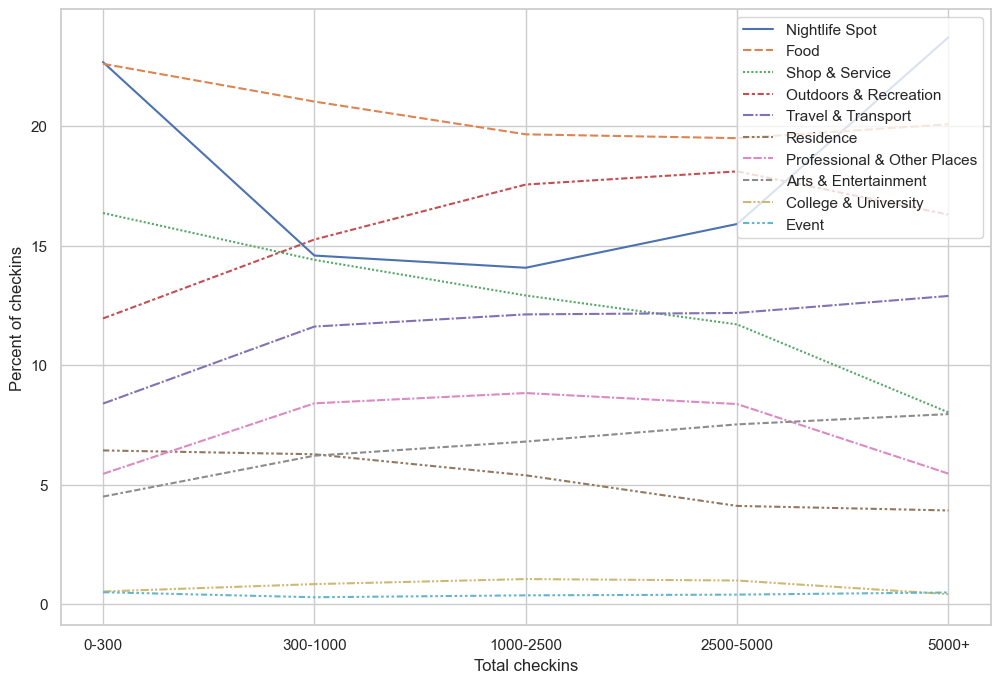

In [81]:
N_TOP_CATEGORIES = 10
def create_data(frames):
    return [frame.values[:N_TOP_CATEGORIES] for frame in frames]
data = create_data([one, two, three, four, five])
# index = ['0-100', '100-500', '500-1000', '1000-5000', '5000+']
index = ['0-300', '300-1000', '1000-2500', '2500-5000', '5000+']
columns = top_unique_categories_index[:N_TOP_CATEGORIES]
lineplot_data = pd.DataFrame(data, index, columns)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.lineplot(data=lineplot_data);
plt.xlabel('Total checkins')
plt.ylabel('Percent of checkins')
plt.legend(loc='upper right')

plt.show()

In [82]:
# create top_unique_styles_index – index for common order among intervals
N_MANY_PLACES = 100

one = popular_retail_venues_of_user_group(intervals[0])
two = popular_retail_venues_of_user_group(intervals[1])
three = popular_retail_venues_of_user_group(intervals[2])
four = popular_retail_venues_of_user_group(intervals[3])
five = popular_retail_venues_of_user_group(intervals[4])

top_unique_categories_index = pd.concat([one, two, three, four, five]).index.drop_duplicates()

one = one.reindex(top_unique_categories_index)
two = two.reindex(top_unique_categories_index)
three = three.reindex(top_unique_categories_index)
four = four.reindex(top_unique_categories_index)
five = five.reindex(top_unique_categories_index)

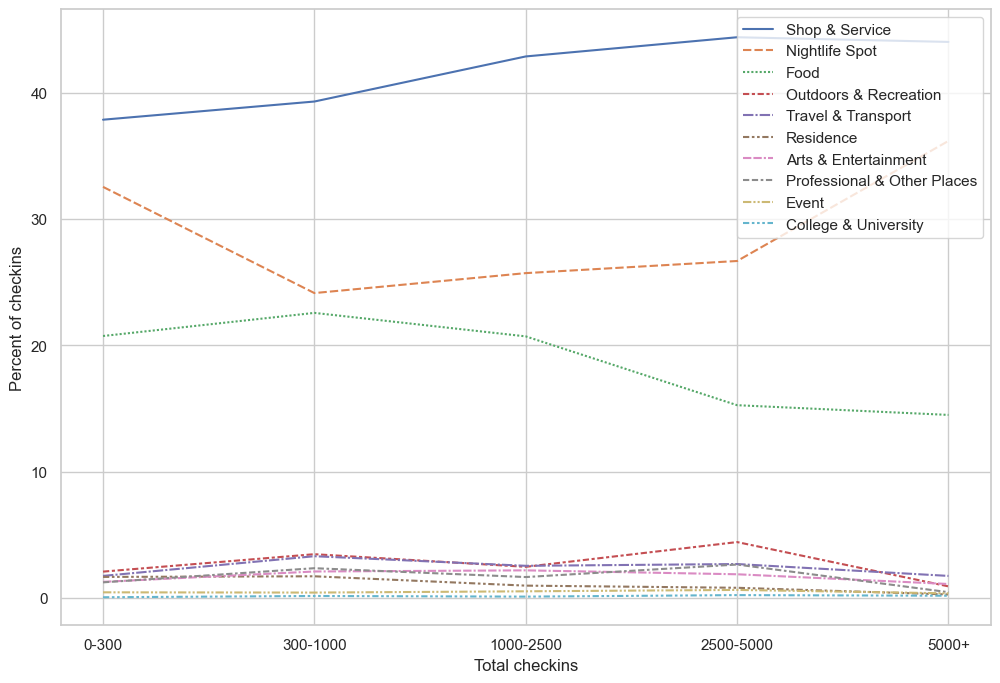

In [83]:
N_TOP_CATEGORIES = 10
def create_data(frames):
    return [frame.values[:N_TOP_CATEGORIES] for frame in frames]
data = create_data([one, two, three, four, five])
# index = ['0-100', '100-500', '500-1000', '1000-5000', '5000+']
index = ['0-300', '300-1000', '1000-2500', '2500-5000', '5000+']
columns = top_unique_categories_index[:N_TOP_CATEGORIES]
lineplot_data = pd.DataFrame(data, index, columns)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.lineplot(data=lineplot_data);
plt.xlabel('Total checkins')
plt.ylabel('Percent of checkins')
plt.legend(loc='upper right')

plt.show()